In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense,advanced_activations,LeakyReLU
from keras import backend as K
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
#import tf.keras.layers.advanced_activations

Using TensorFlow backend.


In [2]:
img_width, img_height = 128,128
train_data_dir = 'Documents/data/train'
validation_data_dir = 'Documents/data/test'
pred_data_dir= 'Documents/data/pred'
nb_train_samples = 126
nb_validation_samples = 24
epochs = 13
batch_size = 9

if K.image_data_format() == 'channels_first': 
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [3]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(64))
model.add(LeakyReLU())


model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 126, 126, 32)      0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 61, 61, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)       

In [4]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    #zca_whitening=True,
    horizontal_flip=True)

In [6]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

In [7]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode="categorical"
    )

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')


Found 126 images belonging to 3 classes.
Found 24 images belonging to 3 classes.


In [8]:

history=model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/13
14/14 [==============================] - 5s 355ms/step - loss: 2.4538 - accuracy: 0.4286 - val_loss: 0.8277 - val_accuracy: 0.6111
Epoch 2/13
14/14 [==============================] - 4s 310ms/step - loss: 0.9874 - accuracy: 0.4524 - val_loss: 0.8516 - val_accuracy: 0.5333
Epoch 3/13
14/14 [==============================] - 5s 346ms/step - loss: 0.9117 - accuracy: 0.5952 - val_loss: 0.7355 - val_accuracy: 0.6000
Epoch 4/13
14/14 [==============================] - 5s 344ms/step - loss: 0.7931 - accuracy: 0.6667 - val_loss: 0.6491 - val_accuracy: 0.7222
Epoch 5/13
14/14 [==============================] - 5s 367ms/step - loss: 0.7268 - accuracy: 0.6984 - val_loss: 0.4059 - val_accuracy: 0.8000
Epoch 6/13
14/14 [==============================] - 5s 346ms/step - loss: 0.5893 - accuracy: 0.6508 - val_loss: 0.3862 - val_accuracy: 0.7333
Epoch 7/13
14/14 [==============================] - 5s 370ms/step - loss: 0.6692 - accuracy: 0.6746 - val_loss: 0.6262 - val_accuracy: 0.7222
Epoch 

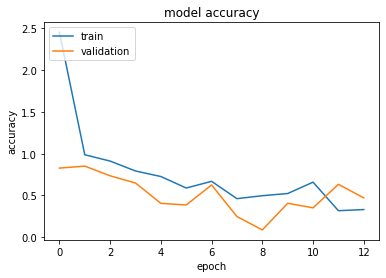

In [9]:
plt.figure(1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [10]:
pred_generator = test_datagen.flow_from_directory(
    pred_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical')
model.save('test_model.h5')






Found 0 images belonging to 0 classes.


In [14]:
from keras.models import load_model
from keras.preprocessing import image
import numpy as np


img_width, img_height = 128,128

model = load_model('test_model.h5')
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


img = image.load_img('Documents/data/pred/3.jpeg', target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict_classes(images, batch_size=5)
print (classes[0])



2


In [12]:
classes = train_generator.class_indices  
print(classes)

{'banana': 0, 'cat': 1, 'palm': 2}
